## **Particle Motion in Displacement**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime


Read, print file header and plot complete file
Assumption: SEED files contains three component data, hence three traces.


3 Trace(s) in Stream:
BK.BK72..HHE | 2020-06-09T00:00:00.008391Z - 2020-06-09T23:59:59.998391Z | 100.0 Hz, 8640000 samples
BK.BK72..HHN | 2020-06-09T00:00:00.008393Z - 2020-06-09T23:59:59.998393Z | 100.0 Hz, 8640000 samples
BK.BK72..HHZ | 2020-06-09T00:00:00.008391Z - 2020-06-09T23:59:59.998391Z | 100.0 Hz, 8640000 samples
         network: BK
         station: BK72
        location: 
         channel: HHE
       starttime: 2020-06-09T00:00:00.008391Z
         endtime: 2020-06-09T23:59:59.998391Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 2354, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 9641984})
         network: BK
         station: BK72
        location: 
         channel: HHN
       starttime: 2020-06-09T00:00:00.008393Z
         endtime: 2020-06-09T23:59:59.998393Z
   sampling_rate: 100.0
           delta

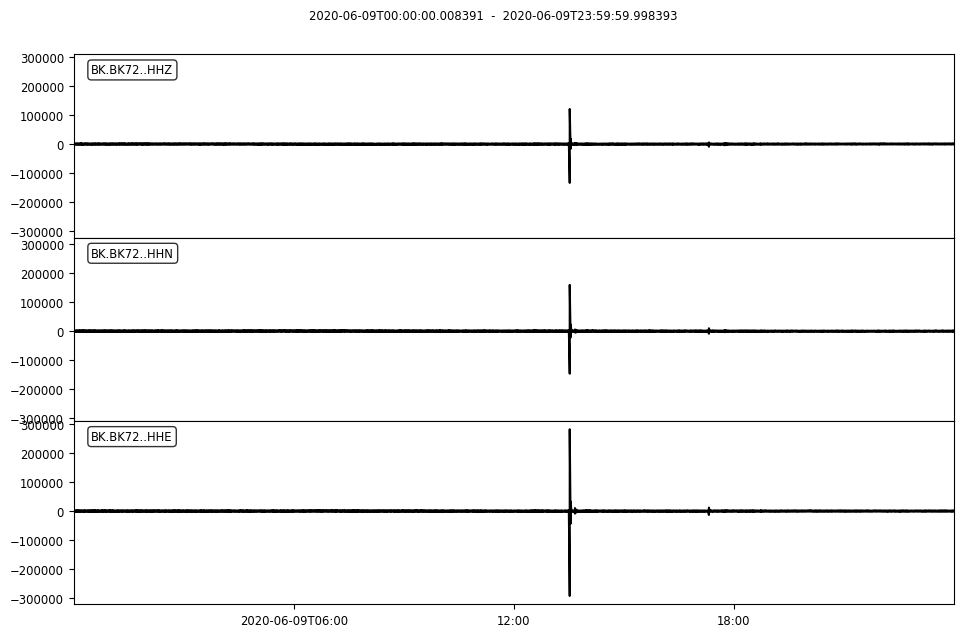

In [5]:
st = read("./Rot Seis/Local/*161")
print(st.__str__(extended=True))

tr0=st[0]
tr1=st[1]
tr2=st[2]
print (tr0.stats)
print (tr1.stats)
print (tr2.stats)

#create overview plot of all traces over full length of file
st.plot(color='black',size=(1000,650),equal_scale=True)

**Select time window** for further analysis, by 
- setting start time in variable "eqtime" in UTC notation and
- setting the length of the window in seconds in varibale "end"

Then plot seismogram of that time window and write a file containing a new stream "ev" with only the selected section of the original file. Filename and path is set in line "ev.write".

2020-06-09T00:00:00.008391Z 2020-06-09T23:59:59.998391Z
************************
2020-06-09T00:00:00.008391Z 2020-06-09T13:32:05.000000Z 2020-06-09T00:00:00.008391Z
2020-06-09T00:00:00.008391Z 2020-06-09T13:32:05.000000Z 48724.991609 48725.991609
3 Trace(s) in Stream:
BK.BK72..HHE | 2020-06-09T13:32:04.998391Z - 2020-06-09T13:32:05.998391Z | 100.0 Hz, 101 samples
BK.BK72..HHN | 2020-06-09T13:32:04.998393Z - 2020-06-09T13:32:05.998393Z | 100.0 Hz, 101 samples
BK.BK72..HHZ | 2020-06-09T13:32:04.998391Z - 2020-06-09T13:32:05.998391Z | 100.0 Hz, 101 samples
**
**


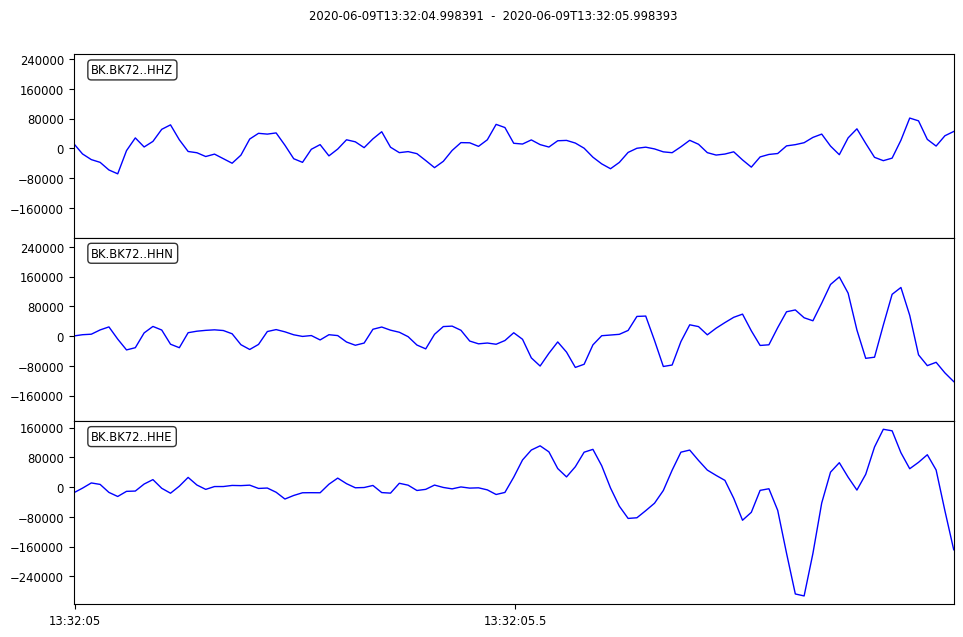

In [14]:
dt=st[0].stats.starttime
tend=st[0].stats.endtime
print (dt,tend)

print("************************")

filebegin=UTCDateTime(dt)
endx=UTCDateTime(tend)
eqtime=UTCDateTime("2020-06-09T13:32:05")
print (dt,eqtime,filebegin)
begin=eqtime-filebegin
end=begin+1
print (dt, eqtime, begin, end)
ev = st.slice(starttime=dt+begin, endtime=dt+end)
print (ev)

print ("**")
print ("**")
ev.plot(color= "blue",size=(1000,650),equal_scale=True)
#ev.write("./Accelerometer/Flip Test/BK73-Flip", format = "MSEED")

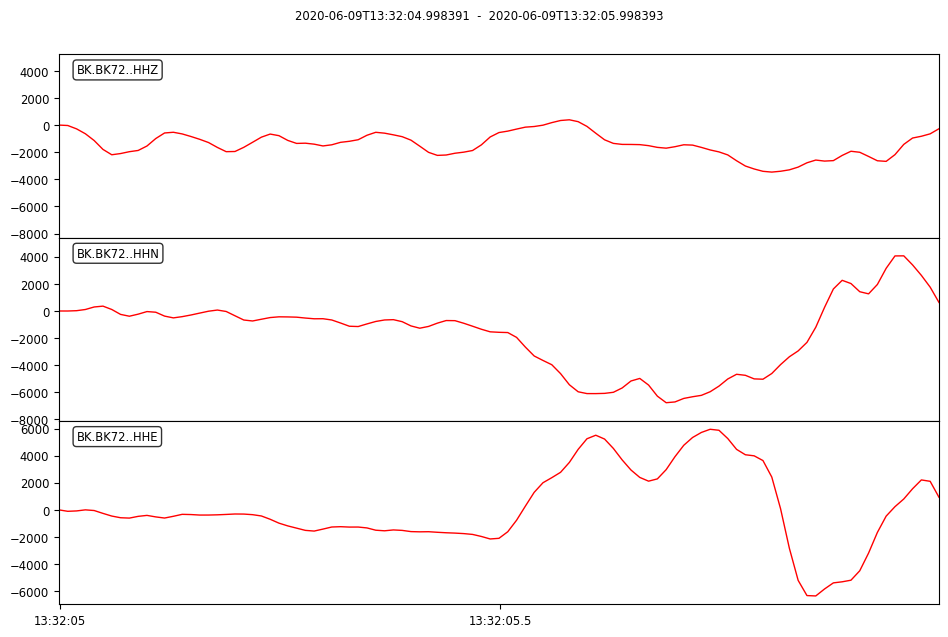

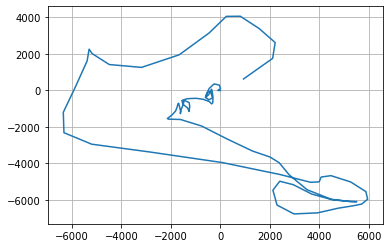

In [18]:
#integrating
ev_int=ev.copy()
ev_int.detrend('demean')
ev_int.integrate(method='cumtrapz')
ev_int.plot(color= "red",size=(1000,650),equal_scale=True)

EW=ev_int[0].data
NS=ev_int[1].data
#for i in range (1500):
    #print (EW[i],NS[i])
    
plt.plot(EW,NS)
plt.grid()
plt.show()